In [9]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
""" http://lib.stat.cmu.edu/datasets/boston
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's """

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./csv/housing.csv', sep='\s+', names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [142]:
X = df.drop('MEDV',1).values
X_nox = df['NOX'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.75, random_state=42)


C:\Users\Matheus\AppData\Local\Temp\ipykernel_15800\1020648873.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('MEDV',1).values


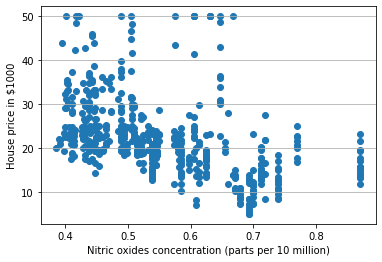

In [109]:
plt.scatter(X_nox,y)
plt.grid(axis= 'y')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('House price in $1000')
plt.show()


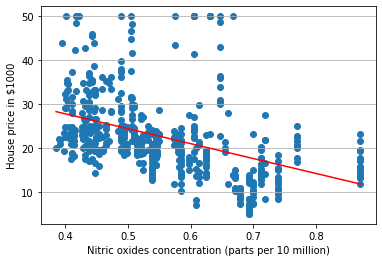

array([[19.97875981]])

In [132]:
reg = LinearRegression()
reg.fit(X_nox,y)
prediction_line = np.linspace(min(X_nox),max(X_nox))

plt.plot(prediction_line, reg.predict(prediction_line), 'r')
plt.scatter(X_nox,y)
plt.grid(axis= 'y')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('House price in $1000')
plt.show()

reg.predict(np.array([[0.63]]))

In [152]:
from sklearn.metrics import r2_score

regt = LinearRegression()
regt.fit(X_train,y_train)
# Total score
print(regt.score(X_val,y_val))
# R2 value
y_prediction = regt.predict(X_train)
print(r2_score(y_train,y_prediction))


0.6844267283527105
0.748087259862344
